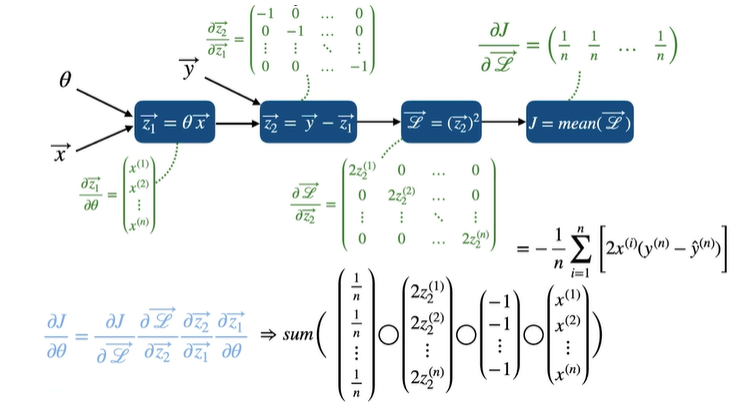

# Basic Building Nodes

In [1]:
class mul_node:
  def forward(self, x, y):
    self._x, self._y = x, y
    self._z = self._x + self._y
    return self._z
  def backward(self, dz):
    return dz*self._y, dz*self._x

class minus_node:
  def forward(self, x, y):
    self._x, self._y = x, y
    self._z = self._x - self._y
    return self._z
  def backward(self, dz):
    return dz, -1*dz

class square_node:
  def forward(self, x):
    self._x = x
    self._z = self._x * self._x
    return self._z
  def backward(self,dz):
    return dz*2*self._x

class mean_node:
  def forward(self, x):
    self._x = x
    self._z = np.mean(self._x)
    return self._z
  def backward(self, dz):
    dx = dz*1/len(self._x)*np.ones_like(self._x)
    return dx

# Process

## Data generation

In [6]:
import numpy as np

x_data = np.random.randint(0,10,size=(100,1))
y_data = np.random.randint(0,10,size=(100,1))

X = x_data[:5]
Y = y_data[:5]

# Hyperparameter Settings

In [19]:
th = -1

lr=0.01

## Model

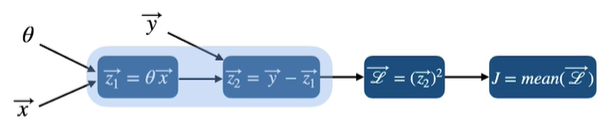

In [7]:
# node implementation

node1 = mul_node()
node2 = minus_node()
node3 = square_node()
node4 = mean_node()

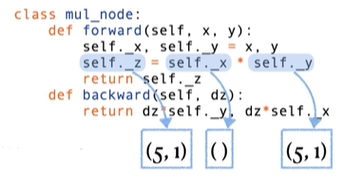

In [10]:
Z1 = node1.forward(th, X)
print(Z1.shape)

(5, 1)


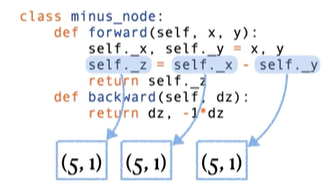

In [11]:
Z2 = node2.forward(Y, Z1)
print(Z2.shape)

(5, 1)


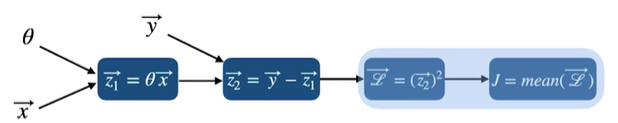

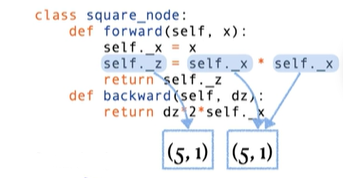

In [12]:
L = node3.forward(Z2)
print(L.shape)

(5, 1)


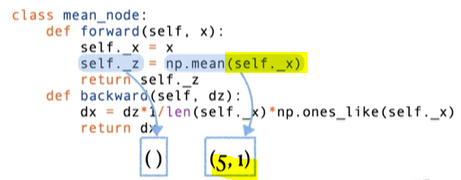

In [13]:
J = node4.forward(L)
print(J.shape)

()


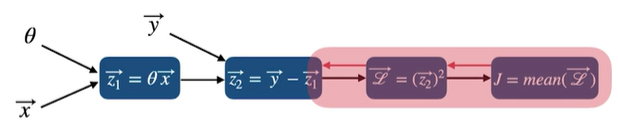

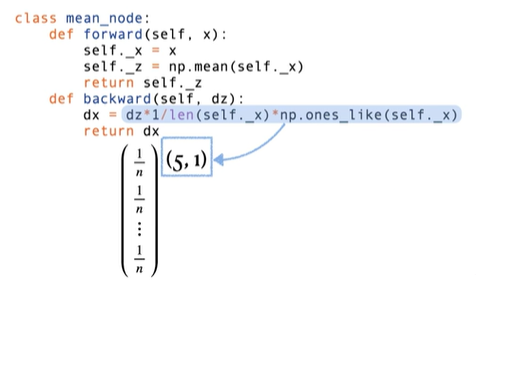

In [14]:
dL = node4.backward(1)
print(dL.shape)

(5, 1)


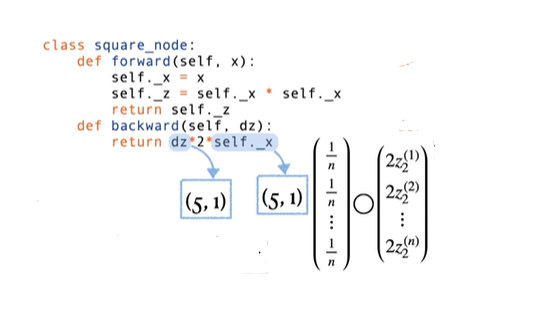

In [16]:
dZ2 = node3.backward(dL)
print(dZ2.shape)

(5, 1)


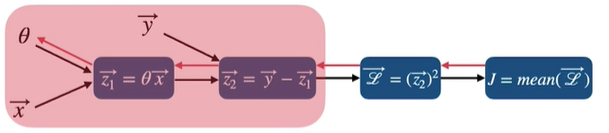

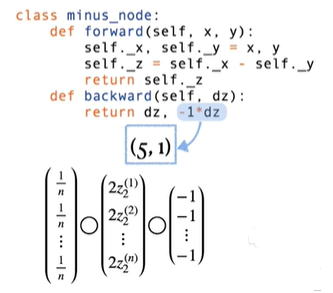

In [17]:
dy, dZ1 = node2.backward(dZ2)
print(dZ1.shape)

(5, 1)


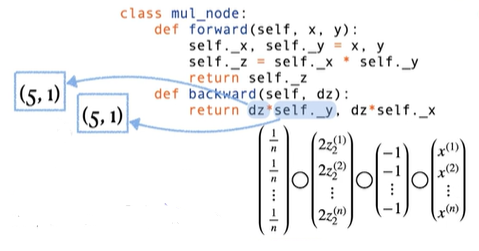

In [18]:
dTh, dX = node1.backward(dZ1)
print(dTh.shape)

(5, 1)


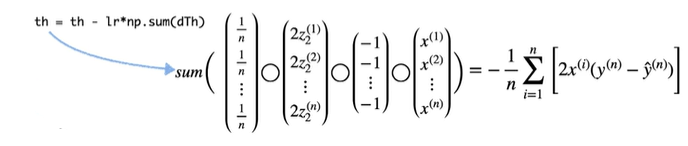

In [20]:
th = th - lr*np.sum(dTh)

# Implementation

## Dataset Preparation

In [22]:
class dataset_generator:
  def __init__(self, feature_dim = 1, n_sample = 100, noise = 0):
    self._feature_dim = feature_dim
    self._n_sample = n_sample
    self._noise = noise

    self._coefficient = None
    self._init_set_coefficient()

  def _init_set_coefficient(self):
    self._coefficient = [1 for _ in range(self._feature_dim)] + [0]  # weights + bias

  def set_n_sample(self, n_sample):
    self._n_sample = n_sample 

  def set_noise(self, noise):
    self._noise = _noise

  def set_coefficient(self, coefficient_list):
     self._coefficient = coefficient_list

  def make_dataset(self):
    x_data = np.random.normal(0, 1, size = (self._n_sample,
                                            self._feature_dim))
    y_data = np.zeros(shape = (self._n_sample, 1))
    for feature_idx in range(self._feature_dim):
      y_data += self._coefficient[feature_idx] * x_data[:,feature_idx].reshape(-1,1)
    y_data += self._coefficient[-1] # bias
    y_data += self._noise*np.random.normal(0,1,size=(self._n_sample, 1))

    return x_data, y_data

  def dataset_visualizer(self):
    if self._feature_dim == 1:
      plt.style.use('seaborn')

      fig, ax = plt.subplots(figsize=(10,10))
      ax.plot(x_data, y_data, 'bo',
              alpha=0.3,
              markersize=20)
      ax.tick_params(axis='both',
                     labelsize=30)
      ax.set_title("Dataset", fontsize=40, color='darkred')
      ax.set_xlabel('X data', fontsize=30, alpha=0.6)
      ax.set_ylabel('Y data', fontsize=30, alpha=0.6)

    else:
      class feature_dim_error(Exception):
        pass
      raise feature_dim_error("Visualization is valid for only feature_dim == 1")

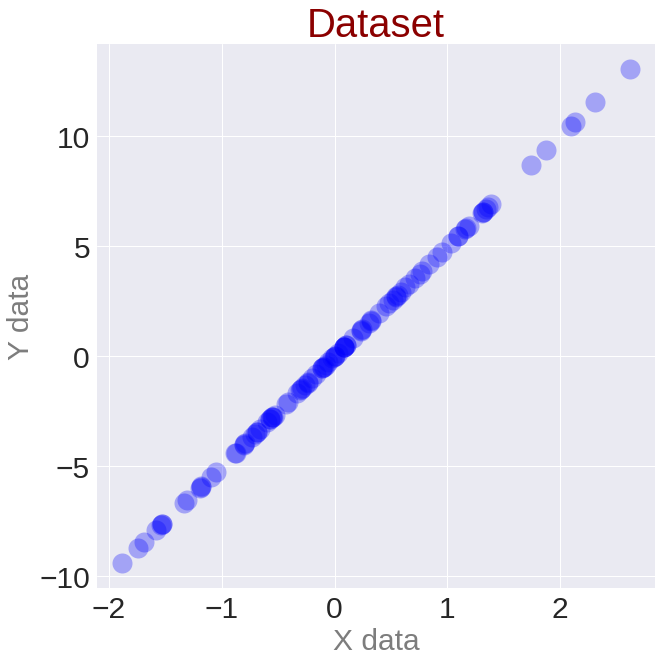

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# dataset preparation
dataset_gen = dataset_generator()
dataset_gen.set_coefficient([5,0]) # y=5x

x_data, y_data = dataset_gen.make_dataset()
dataset_gen.dataset_visualizer()

## Model and Cost Setting

In [33]:
# model part
node1 = mul_node()

# square error and MSE cost part
node2 = minus_node()
node3 = square_node()
node4 = mean_node()

## Hyper-parameter Setting

In [38]:
# hyperparameter Setting
epochs = 50 # total epoch setting
lr = 0.05 # learning rate setting

th = -1
cost_list = []
th_list = []

## Learning Process

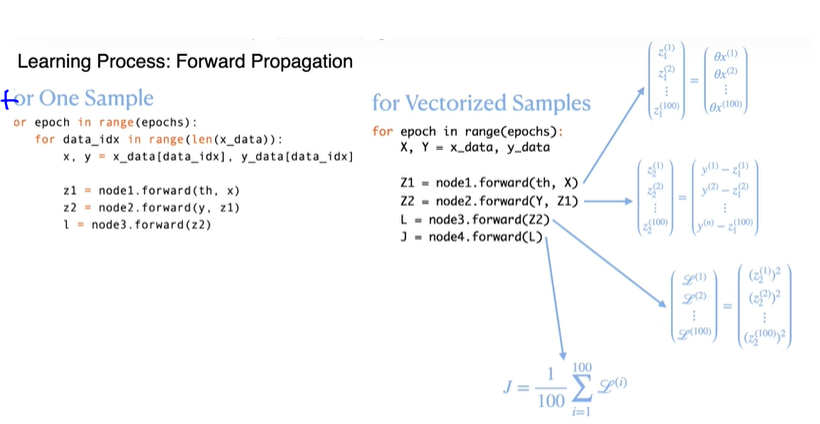

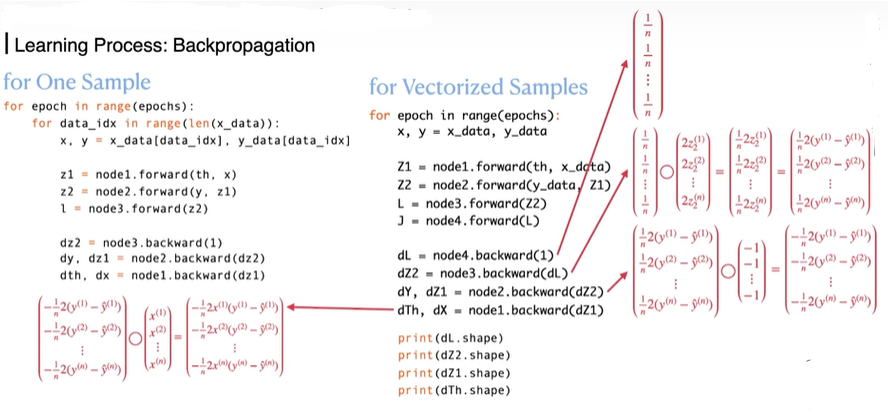

In [40]:
for epoch in range(epochs):
  X, Y = x_data, y_data

  # forward propagation
  Z1 = node1.forward(th, X)
  Z2 = node2.forward(Y, Z1)
  L = node3.forward(Z2)
  J = node4.forward(L)

  # backward propagation
  dL = node4.backward(1)
  dZ2 = node3.backward(dL)
  dY, dZ1 = node2.backward(dZ2)
  dTh, dX = node1.backward(dZ1)

  th = th - lr*np.sum(dTh)

  th_list.append(th)
  cost_list.append(J)